# handwriting determination with MNIST

In [2]:
# importing libs
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
import os

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import h5py as h5

# f=h5.File(data, 'r')


In [3]:
# loading MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

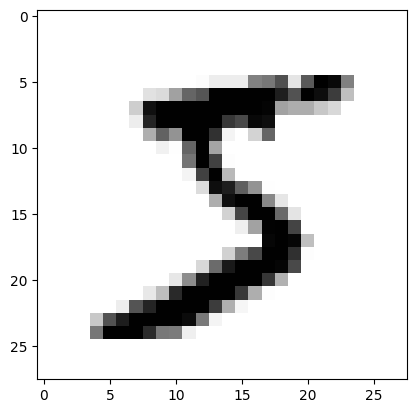

In [4]:
plt.imshow(X_train[0], cmap='binary')

In [5]:
def plot_image(i):
  plt.imshow(X_train[i], cmap='binary')
  plt.title(y_test[i])
  plt.show()

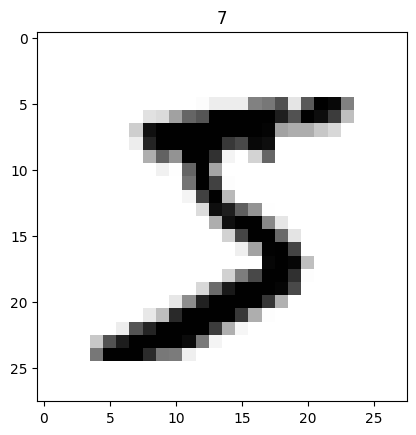

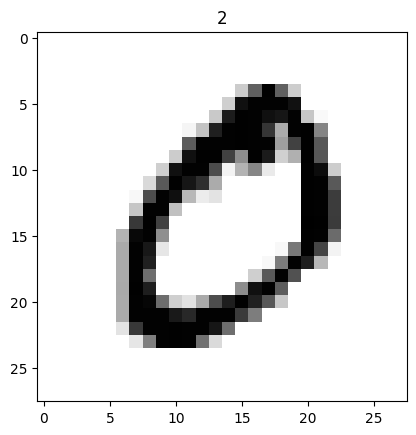

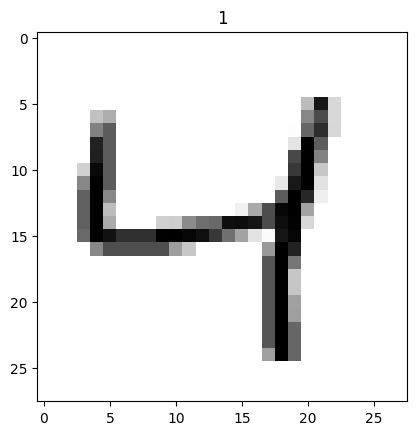

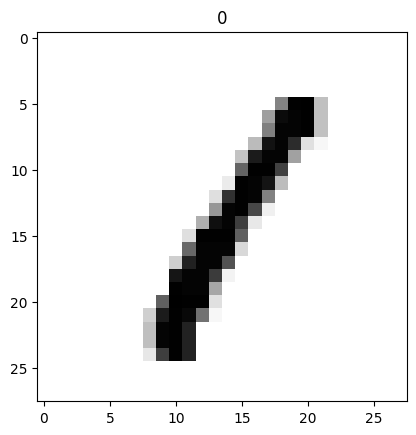

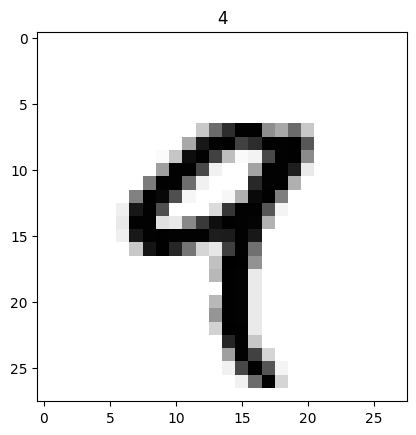

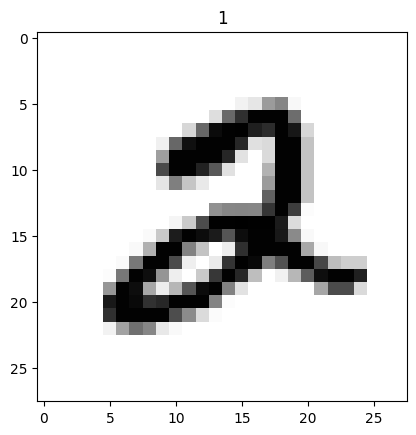

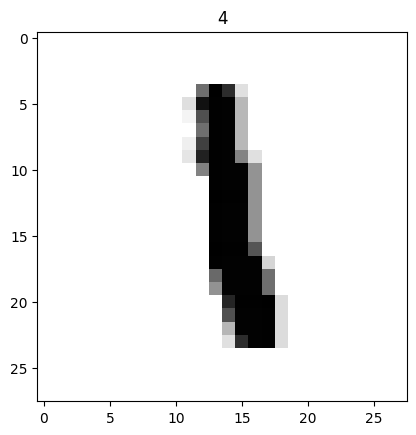

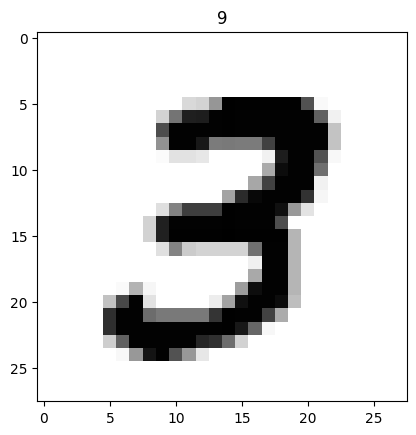

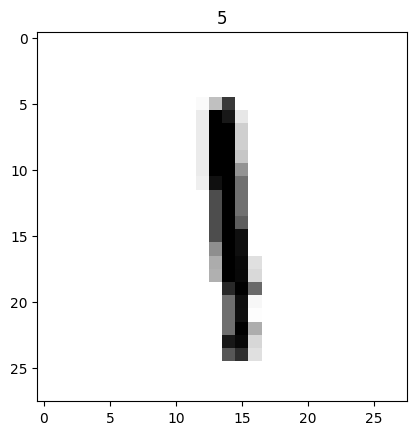

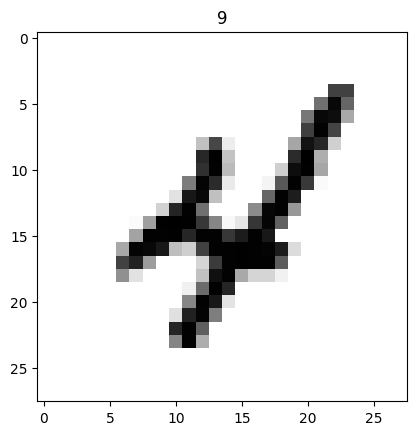

In [6]:
for i in range(10):
  plot_image(i)

# image preprocessing


In [7]:
# mormalizing both train and test data(input)
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255


In [8]:
# reshaping the image
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train.shape

(60000, 28, 28, 1)

In [9]:
# categorizing y data
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# creating a model with keras

In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [12]:
# compiling the model
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [13]:
# early stopping and checkpoint
es = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1)

cp = ModelCheckpoint('best_model.h5', monitor='val_acc', verbose='1', save_best_only=True)

# callback
cb = [es, cp]

# model training

In [14]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.3, callbacks = cb)


Epoch 1/50
1313/1313 [==============================] - 59s 32ms/step - loss: 0.2571 - accuracy: 0.9213 - val_loss: 0.0790 - val_accuracy: 0.9773
Epoch 2/50
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0909 - accuracy: 0.9718 - val_loss: 0.0615 - val_accuracy: 0.9808
Epoch 3/50
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0712 - accuracy: 0.9784 - val_loss: 0.0580 - val_accuracy: 0.9813
Epoch 4/50
1313/1313 [==============================] - 47s 36ms/step - loss: 0.0604 - accuracy: 0.9811 - val_loss: 0.0449 - val_accuracy: 0.9862
Epoch 5/50
1313/1313 [==============================] - 44s 34ms/step - loss: 0.0532 - accuracy: 0.9832 - val_loss: 0.0438 - val_accuracy: 0.9862
Epoch 6/50
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0470 - accuracy: 0.9853 - val_loss: 0.0468 - val_accuracy: 0.9865
Epoch 7/50
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0435 - accuracy: 0.9864 - val_loss: 0.0376 -

In [15]:
model.save('best_model.h5')

c:\Users\daraa\Documents\31DaysOfMLProjects\d15-handwriting classification\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
model_load = keras.models.load_model(r'C:\Users\daraa\Downloads\d15-handwriting classification\best_model.h5')

In [20]:
score = model_load.evaluate(X_test, y_test)
print(f'the model accuraccy is {score[1]}')

313/313 [==============================] - 11s 14ms/step - loss: 0.0294 - accuracy: 0.9928
the model accuraccy is 0.9927999973297119
